<a href="https://colab.research.google.com/github/BenJiYu/SNS/blob/main/SNS_UT03_2_BenjaminJimenezYu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SNS UNIDAD DE TRABAJO 3 - ACTIVIDAD 2
Autor: Benjamín Jiménez Yu

In [27]:
# ==========================
# 1. Importación de librerías
# ==========================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Clasificadores Naive Bayes
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    ComplementNB,
    BernoulliNB,
    CategoricalNB
)

import seaborn as sns
import matplotlib.pyplot as plt


# ==========================
# 2. Cargar Dataset IRIS
# ==========================

from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target


# ==========================
# 3. Cargar Dataset PENGUINS
# ==========================

# El penguins viene en seaborn
penguins = sns.load_dataset("penguins")

# Eliminamos filas con valores faltantes
penguins = penguins.dropna()

# Variables predictoras
X_peng = penguins.drop("species", axis=1)

# Variable objetivo
y_peng = penguins["species"]

# ==========================
# 4. Preprocesamiento para Naive Bayes
# ==========================

# Para modelos gaussianos: se permite X tal cual
X_peng_gauss = X_peng.copy()

# Para MultinomialNB y ComplementNB necesitamos valores no negativos
# → Reescalamos a [0,1]
minmax = MinMaxScaler()
X_peng_mult = pd.DataFrame(minmax.fit_transform(X_peng.select_dtypes(include=[np.number])),
                           columns=X_peng.select_dtypes(include=[np.number]).columns)

# Para BernoulliNB necesitamos variables binarias
# Convertimos las numéricas a 0/1 con un umbral
X_peng_bern = (X_peng.select_dtypes(include=[np.number]) > X_peng.select_dtypes(include=[np.number]).median()).astype(int)

# Para CategoricalNB necesitamos variables categóricas codificadas ordinalmente
encoder = OrdinalEncoder()
X_peng_cat = pd.DataFrame(
    encoder.fit_transform(X_peng),
    columns=X_peng.columns
)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, OrdinalEncoder
from sklearn.metrics import accuracy_score

# ==========================
# IRIS: train / test
# ==========================
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# ==========================
# PENGUINS: índices para mantener coherencia en todas las variantes
# ==========================
indices = np.arange(len(X_peng))
train_idx, test_idx = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=y_peng
)

y_train_peng = y_peng.iloc[train_idx]
y_test_peng = y_peng.iloc[test_idx]

def entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test, nombre_modelo, nombre_dataset):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{nombre_dataset} | {nombre_modelo} -> Precisión: {acc:.4f}")
    return modelo, y_pred

In [29]:
# Escalado estándar para GaussianNB (opcional pero razonable)
scaler_iris = StandardScaler()
X_train_iris_gauss = scaler_iris.fit_transform(X_train_iris)
X_test_iris_gauss  = scaler_iris.transform(X_test_iris)

gnb_iris = GaussianNB()
gnb_iris, y_pred_gnb_iris = entrenar_y_evaluar(
    gnb_iris,
    X_train_iris_gauss,
    X_test_iris_gauss,
    y_train_iris,
    y_test_iris,
    "GaussianNB",
    "IRIS"
)

# Escalado MinMax a [0, 1] para cumplir estrictamente con MultinomialNB
minmax_iris = MinMaxScaler()
X_train_iris_mult = minmax_iris.fit_transform(X_train_iris)
X_test_iris_mult  = minmax_iris.transform(X_test_iris)

mnb_iris = MultinomialNB()
mnb_iris, y_pred_mnb_iris = entrenar_y_evaluar(
    mnb_iris,
    X_train_iris_mult,
    X_test_iris_mult,
    y_train_iris,
    y_test_iris,
    "MultinomialNB",
    "IRIS"
)

cnb_iris = ComplementNB()
cnb_iris, y_pred_cnb_iris = entrenar_y_evaluar(
    cnb_iris,
    X_train_iris_mult,
    X_test_iris_mult,
    y_train_iris,
    y_test_iris,
    "ComplementNB",
    "IRIS"
)

# Binarizamos usando la mediana como umbral
iris_median = np.median(X_train_iris, axis=0)

X_train_iris_bern = (X_train_iris > iris_median).astype(int)
X_test_iris_bern  = (X_test_iris  > iris_median).astype(int)

bnb_iris = BernoulliNB()
bnb_iris, y_pred_bnb_iris = entrenar_y_evaluar(
    bnb_iris,
    X_train_iris_bern,
    X_test_iris_bern,
    y_train_iris,
    y_test_iris,
    "BernoulliNB",
    "IRIS"
)

# Discretizamos las características continuas en categorías (bins)
kbins = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")
X_train_iris_cat = kbins.fit_transform(X_train_iris)
X_test_iris_cat  = kbins.transform(X_test_iris)

catnb_iris = CategoricalNB()
catnb_iris, y_pred_catnb_iris = entrenar_y_evaluar(
    catnb_iris,
    X_train_iris_cat,
    X_test_iris_cat,
    y_train_iris,
    y_test_iris,
    "CategoricalNB",
    "IRIS"
)

IRIS | GaussianNB -> Precisión: 0.9667
IRIS | MultinomialNB -> Precisión: 0.8333
IRIS | ComplementNB -> Precisión: 0.6667
IRIS | BernoulliNB -> Precisión: 0.7000
IRIS | CategoricalNB -> Precisión: 0.8333


In [30]:
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

# ==========================
# 1. Partimos de:
#   - X_peng (features originales de penguins, sin species)
#   - y_peng
#   - train_idx, test_idx (ya creados antes)
# ==========================

X_train_peng_raw = X_peng.iloc[train_idx].copy()
X_test_peng_raw  = X_peng.iloc[test_idx].copy()

y_train_peng = y_peng.iloc[train_idx]
y_test_peng  = y_peng.iloc[test_idx]

# ==========================
# 2. Separar columnas categóricas y numéricas
# ==========================

cat_cols = X_train_peng_raw.select_dtypes(include=["object", "category"]).columns
num_cols = X_train_peng_raw.select_dtypes(include=["number"]).columns

# ==========================
# 3. Codificar categóricas con OrdinalEncoder
# ==========================

enc_cat = OrdinalEncoder()
X_train_cat_part = enc_cat.fit_transform(X_train_peng_raw[cat_cols])
X_test_cat_part  = enc_cat.transform(X_test_peng_raw[cat_cols])

# ==========================
# 4. Discretizar numéricas en bins (categorías ordinales)
# ==========================

kbins = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")

X_train_num_part = kbins.fit_transform(X_train_peng_raw[num_cols])
X_test_num_part  = kbins.transform(X_test_peng_raw[num_cols])

# ==========================
# 5. Unir ambas partes y convertir a int
# ==========================

X_train_peng_cat = np.hstack([X_train_cat_part, X_train_num_part]).astype(int)
X_test_peng_cat  = np.hstack([X_test_cat_part,  X_test_num_part]).astype(int)

# ==========================
# 6. Entrenar CategoricalNB correctamente
# ==========================

catnb_peng = CategoricalNB()
catnb_peng, y_pred_catnb_peng = entrenar_y_evaluar(
    catnb_peng,
    X_train_peng_cat,
    X_test_peng_cat,
    y_train_peng,
    y_test_peng,
    "CategoricalNB",
    "PENGUINS"
)


PENGUINS | CategoricalNB -> Precisión: 0.9552


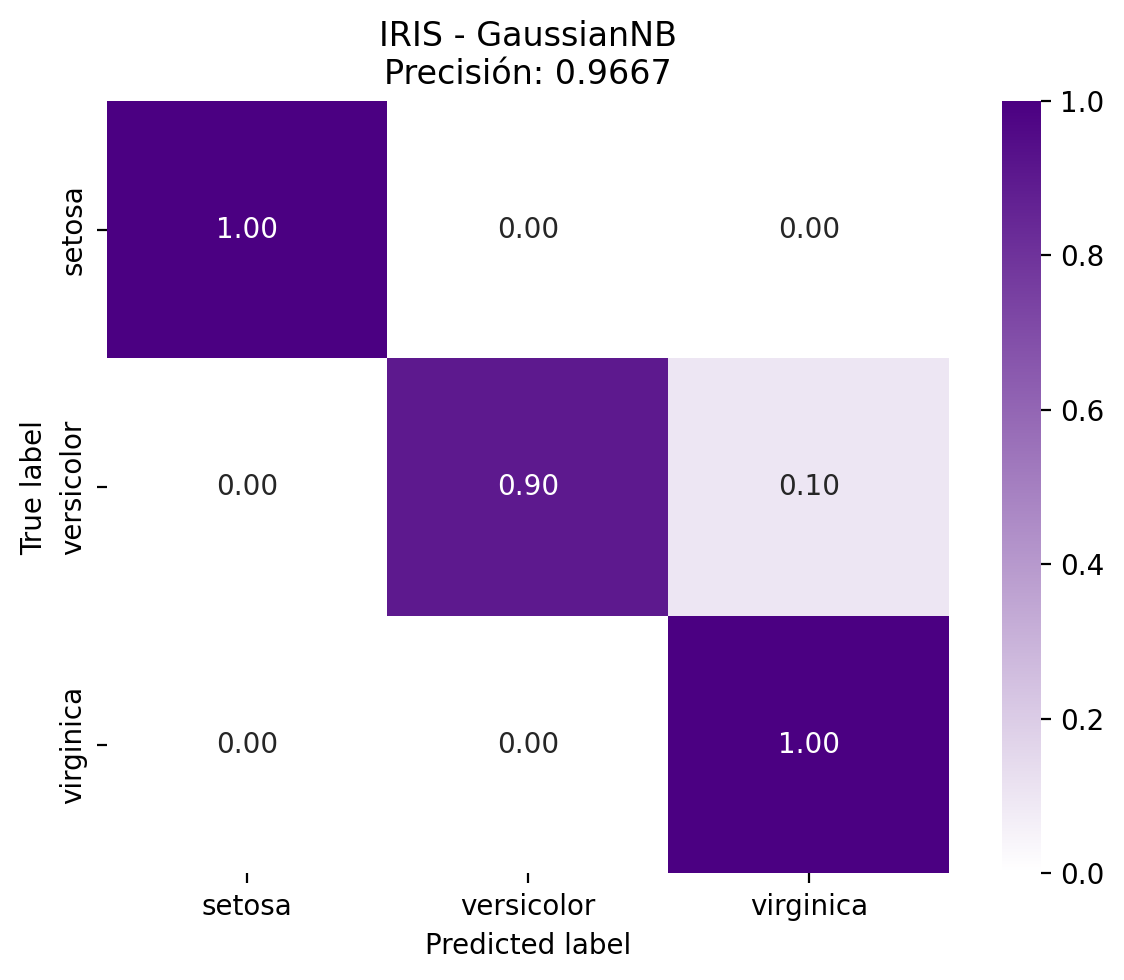

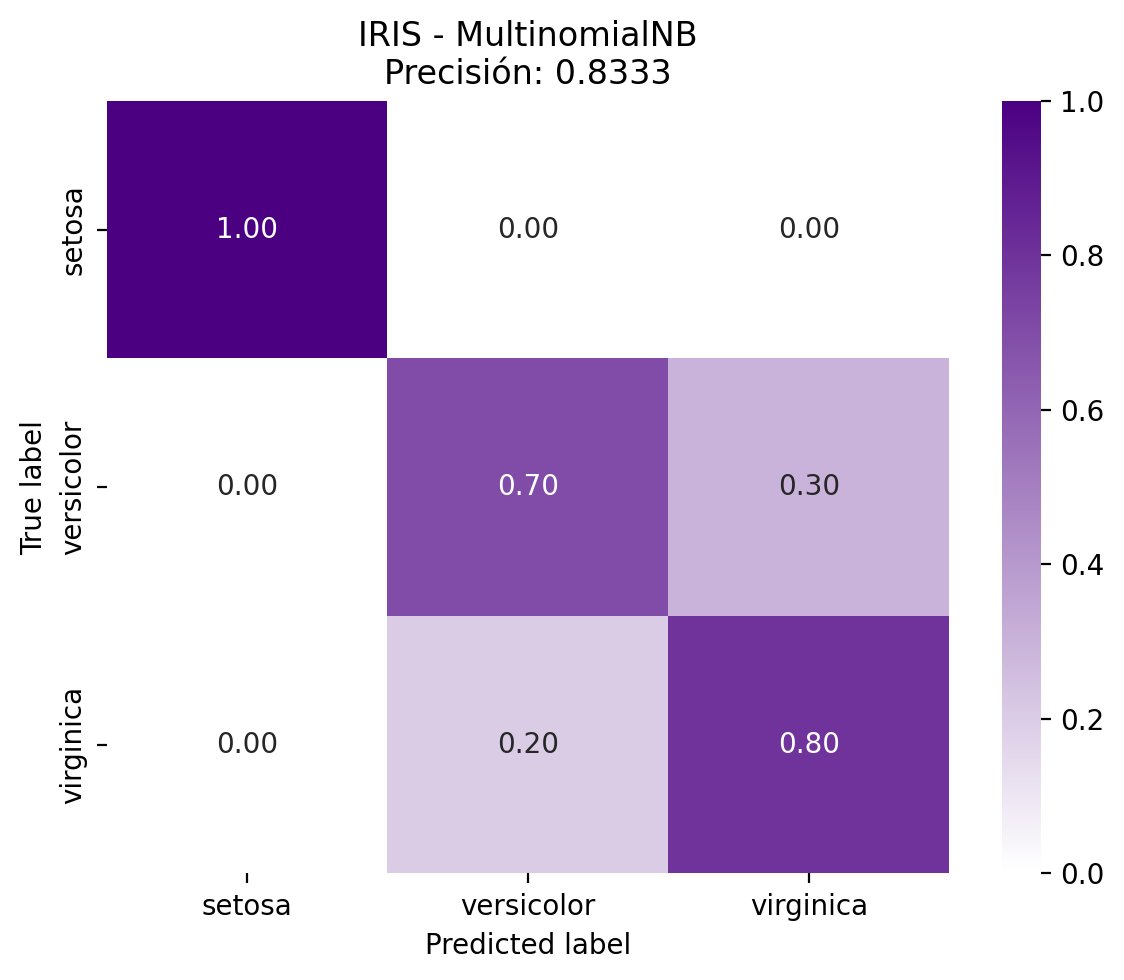

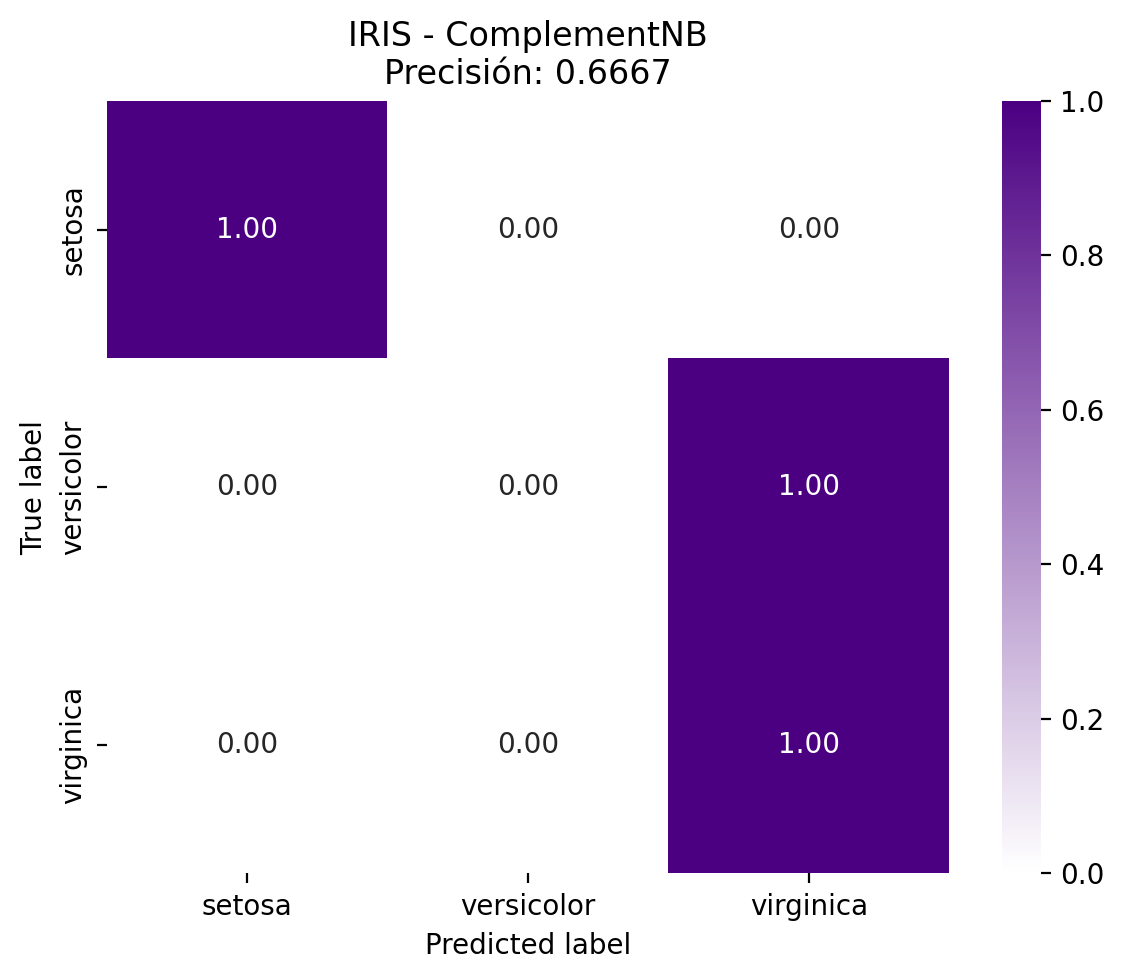

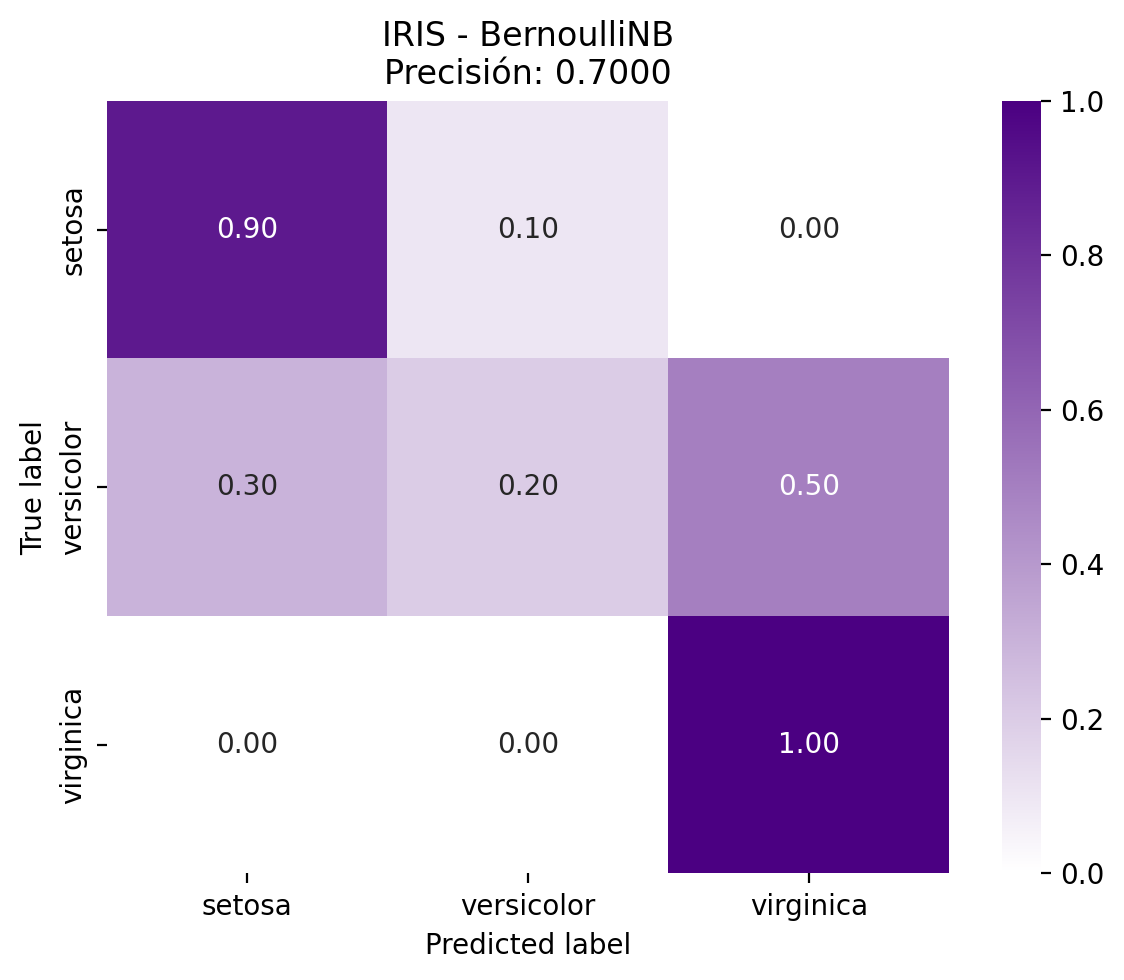

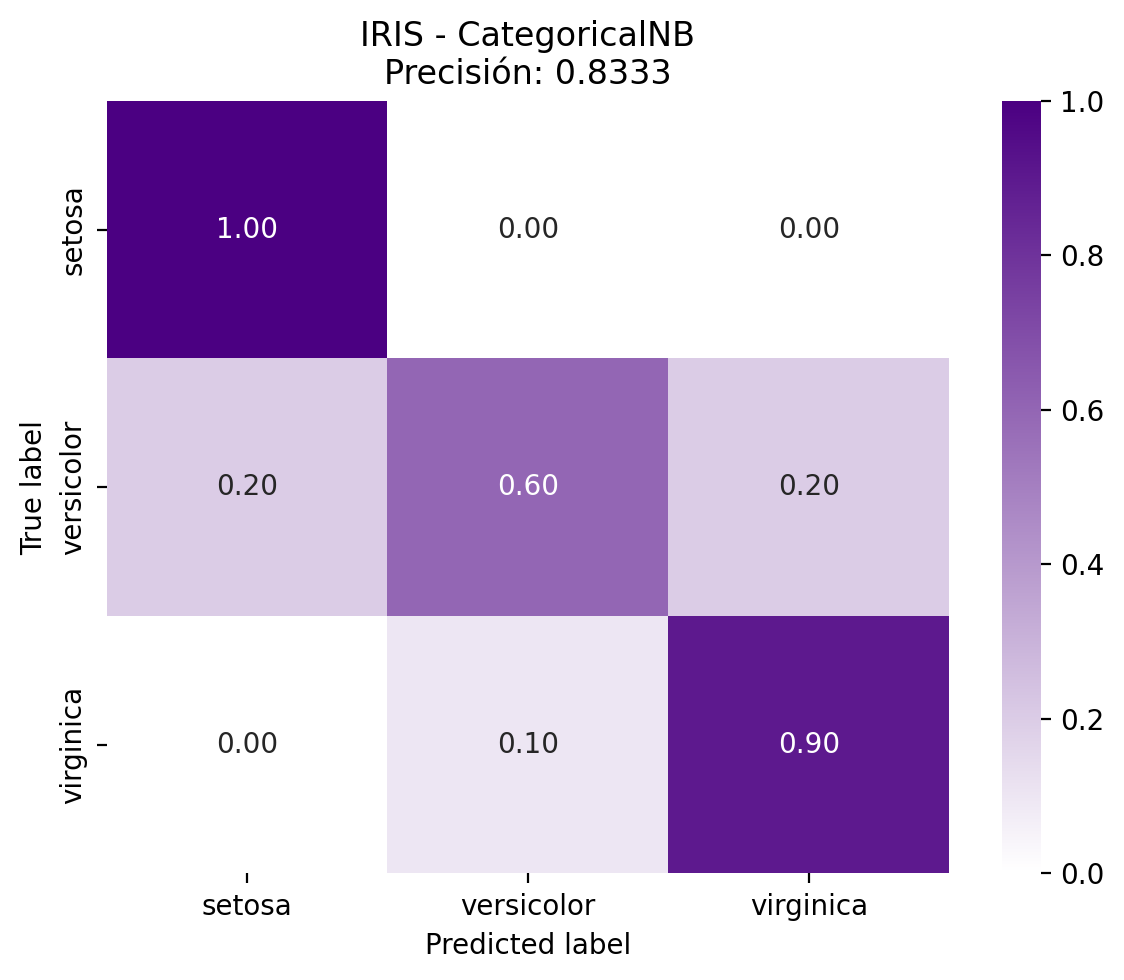

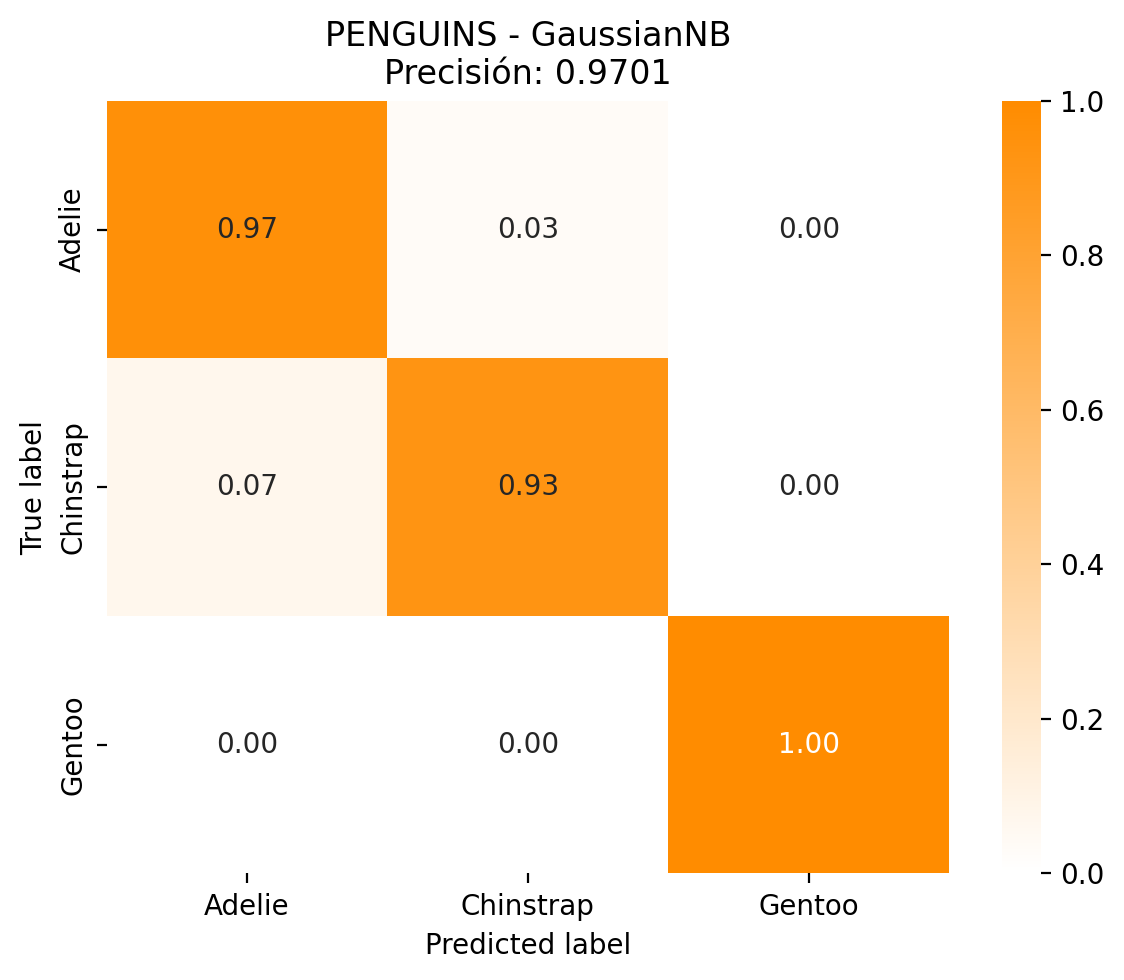

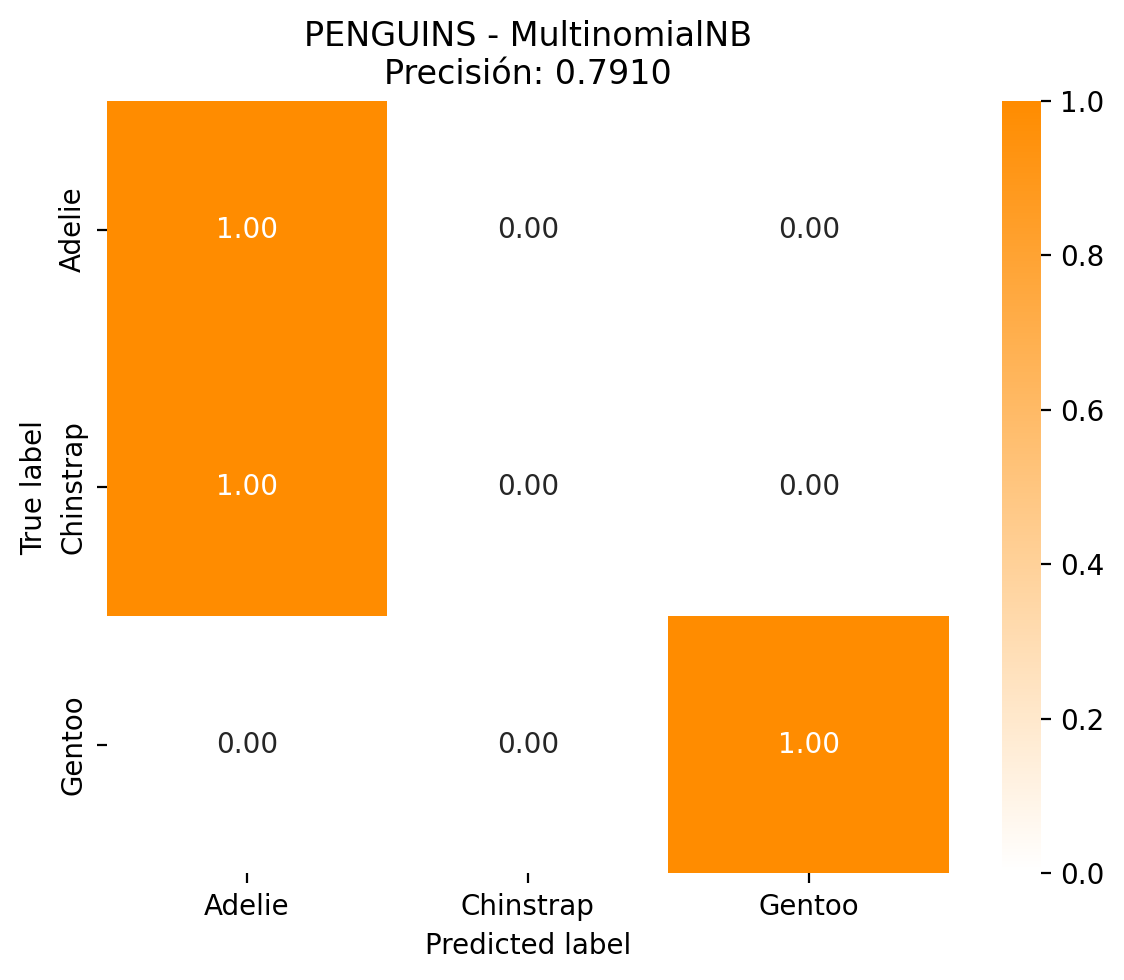

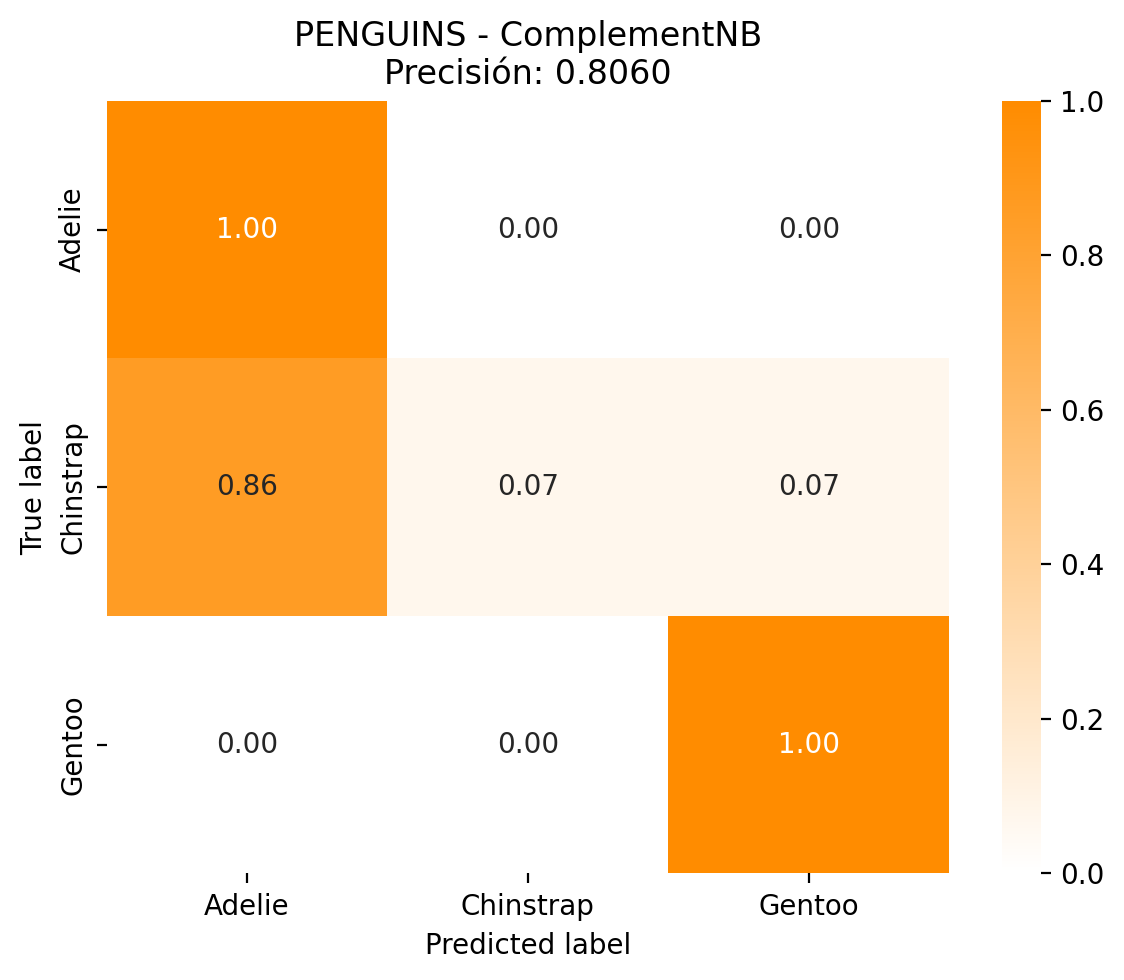

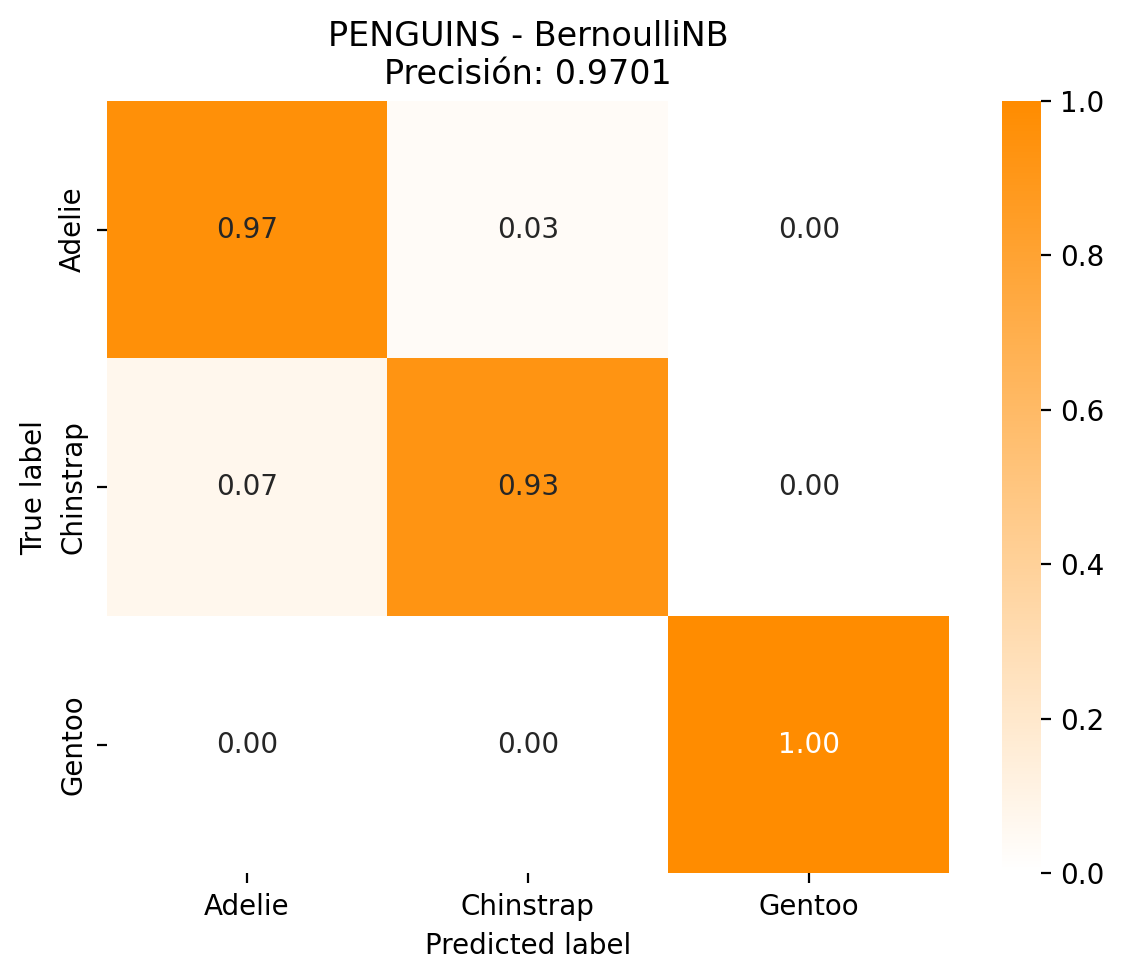

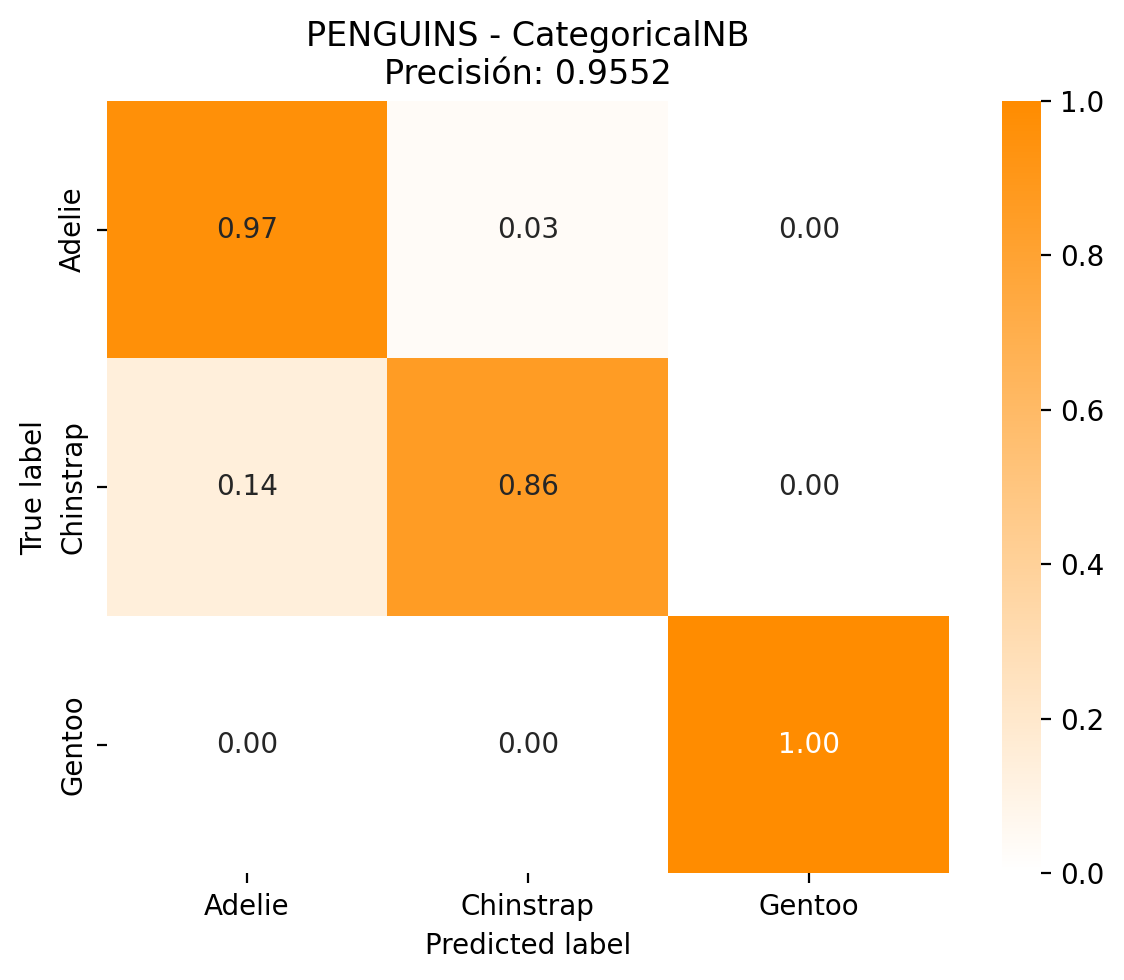

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import LinearSegmentedColormap

# Colores
cmap_iris = LinearSegmentedColormap.from_list(
    "white_purple", ["#ffffff", "#4B0082"]
)
cmap_penguins = LinearSegmentedColormap.from_list(
    "white_orange", ["#ffffff", "#FF8C00"]
)

def plot_confusion_single(y_true, y_pred, class_names, title, cmap,
                          figsize=(6, 5), dpi=200):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, normalize="true")

    plt.figure(figsize=figsize, dpi=dpi)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=True,
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"{title}\nPrecisión: {acc:.4f}")
    plt.tight_layout()
    plt.show()

class_names_iris = iris.target_names

# GaussianNB
plot_confusion_single(
    y_test_iris,
    y_pred_gnb_iris,
    class_names_iris,
    "IRIS - GaussianNB",
    cmap_iris
)

# MultinomialNB
plot_confusion_single(
    y_test_iris,
    y_pred_mnb_iris,
    class_names_iris,
    "IRIS - MultinomialNB",
    cmap_iris
)

# ComplementNB
plot_confusion_single(
    y_test_iris,
    y_pred_cnb_iris,
    class_names_iris,
    "IRIS - ComplementNB",
    cmap_iris
)

# BernoulliNB
plot_confusion_single(
    y_test_iris,
    y_pred_bnb_iris,
    class_names_iris,
    "IRIS - BernoulliNB",
    cmap_iris
)

# CategoricalNB
plot_confusion_single(
    y_test_iris,
    y_pred_catnb_iris,
    class_names_iris,
    "IRIS - CategoricalNB",
    cmap_iris
)

class_names_peng = sorted(y_peng.unique())

# GaussianNB
plot_confusion_single(
    y_test_peng,
    y_pred_gnb_peng,
    class_names_peng,
    "PENGUINS - GaussianNB",
    cmap_penguins
)

# MultinomialNB
plot_confusion_single(
    y_test_peng,
    y_pred_mnb_peng,
    class_names_peng,
    "PENGUINS - MultinomialNB",
    cmap_penguins
)

# ComplementNB
plot_confusion_single(
    y_test_peng,
    y_pred_cnb_peng,
    class_names_peng,
    "PENGUINS - ComplementNB",
    cmap_penguins
)

# BernoulliNB
plot_confusion_single(
    y_test_peng,
    y_pred_bnb_peng,
    class_names_peng,
    "PENGUINS - BernoulliNB",
    cmap_penguins
)

# CategoricalNB
plot_confusion_single(
    y_test_peng,
    y_pred_catnb_peng,
    class_names_peng,
    "PENGUINS - CategoricalNB",
    cmap_penguins
)
